# Module 5 Part 1: Hypothesis Testing

# Introduction

The previous module covered inference for continuous variables. This module introduces the hypothesis testing framework, which allows us to formally evaluate claims about the population.

Part 2 of this module will extend the concepts of inference to categorical variables. Tests for categorical data apply mainly to nominal data. However, the same concepts can be extended to ordinal data by treating the data as nominal.

In addition, we will cover:

* The extension of hypothesis testing to nominal variables by applying the normal approximation to the binomial distribution
* Statistical tools developed for nominal variables that can be used to analyze frequencies or proportions of different categories
* Tests that can be performed on nominal variables

This module consists of 2 parts:

- **Part 1** - Hypothesis Testing

- **Part 2** - Introduction to Inference for Categorical Variables

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.  

# Learning Outcomes

After completing this notebook, you will be able to:

- Evaluate claims about a population using the hypothesis testing framework
- Choose appropriate hypotheses
- Evaluate the power of test and choose the appropriate sample size

# Reading and Resources

We invite you to further supplement this notebook with the following recommended text:

Diez, D., Çetinkaya-Rundel, M., Barr, C.D. (2019). Chapter 7: Inference for numerical data in *OpenIntro Statistics (4th Ed.).* https://www.openintro.org/stat/textbook.php?stat_book=os 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-5-Part-1:-Hypothesis-Testing" data-toc-modified-id="Module-5-Part-1:-Hypothesis-Testing">Module 5 Part 1: Hypothesis Testing</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Reading-and-Resources" data-toc-modified-id="Reading-and-Resources">Reading and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing">Hypothesis Testing</a></span>
<ul class="toc-item">
<li><span><a href="#The-hypothesis-testing-framework" data-toc-modified-id="The-hypothesis-testing-framework">The hypothesis testing framework</a></span>
</li>
<li><span><a href="#One-and-two-sided-tail-tests" data-toc-modified-id="One-and-two-sided-tail-tests">One and two-sided tail tests</a></span>
<ul class="toc-item">
<li><span><a href="#One-or-two-tailed-test" data-toc-modified-id="One-or-two-tailed-test">One or two-tailed test</a></span>
</li>
</ul>
</li>
<li><span><a href="#Decision-errors" data-toc-modified-id="Decision-errors">Decision errors</a></span>
</li>
<li><span><a href="#Power-of-test" data-toc-modified-id="Power-of-test">Power of test</a></span>
</li>
<li><span><a href="#Hypothesis-Test-Methodology" data-toc-modified-id="Hypothesis-Test-Methodology">Hypothesis Test Methodology</a></span>
</li>
<li><span><a href="#Types-of-hypothesis-tests" data-toc-modified-id="Types-of-hypothesis-tests">Types of hypothesis tests</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Hypothesis Testing

## The hypothesis testing framework

We are continually performing non-statistical hypothesis tests throughout our daily lives. Every time somebody says something, we are judging its credibility based on previous experience, the evidence available, etc. Let's illustrate this using a classical non-statistical example: the criminal court system.

When a person is accused of a crime, they face a trial. The defendant is assumed innocent, and it is the work of the prosecutor to bring evidence for the court to make a judgement on the prosecutor's claim. The jury will decide, based on the evidence presented by the prosecutor, if the defendant is guilty beyond any reasonable doubt. If the jury does not find the evidence to be sufficient, they will not state that the defendant is innocent, they will state that the defendant is "not guilty." On the other hand, if the proof is deemed to be "beyond reasonable doubt," the jury will decide that the defendant is "guilty."

In statistical jargon, there are two hypotheses: the common belief that the defendant is innocent, called the null hypothesis ($H_0$), and the alternative hypothesis that the defendant is guilty ($H_a$).

- $H_0$: Null hypothesis &mdash; the defendant is innocent


- $H_a$ or $H_1$: Alternative hypothesis &mdash; the defendant is guilty

If the jury finds the defendant guilty, it is rejecting the null hypothesis in favour of the alternative: stating that there is enough evidence to conclude that the defendant is guilty beyond any reasonable doubt. If the evidence is not beyond any reasonable doubt, the jury will conclude that the defendant is not guilty. Notice that the jury does not say innocent &mdash; innocence is not something to prove, rather it is the shared premise $H_0$. Similarly, a statistician will never accept the null hypothesis as proven, instead they will fail to reject the null hypothesis. For this reason, the alternative hypothesis is also called the research hypothesis.

In the case of statistical hypothesis testing, the practitioner is interested in finding out if a parameter equals a certain number. For example, consider the following hypotheses:

- $H_0$: $\mu = 50$


- $H_a$: $\mu \neq 50$

What does "beyond reasonable doubt" mean in this context? 

It is the probability of making a mistake that the practitioner is willing to accept or is comfortable with. Typically, this is set at 5%, which is called the **significance level** with an **$\alpha$**  of 0.05. To do this we need the 95% **confidence interval** &mdash; i.e. what range we would expect some measurement such as the mean to fall in at least 95% of the time if we repeated the experiment many times and the null hypothesis is true. This allows for the fact that we are making the decision based on a sample, not on the whole population, and so there will be some **sampling error** that will occasionally give us a sample that isn't representative and hence a value for our measurement which isn't accurate, making the null hypothesis appear to be incorrect.

The practitioner would:

1. Calculate a 95% confidence interval assuming that $H_0$: $\mu = 50$ is true.<br><br>

2. Collect a representative sample from the population.<br><br>

3. Check if the point estimate falls within the confidence interval calculated.

If the sample mean falls within the confidence interval under the null hypothesis, they will determine that there is no reason to think otherwise, and will fail to reject the null hypothesis.  

If, however, the sample mean is not in the confidence interval, the practitioner would deem the result highly improbable under the null hypothesis (less than 5%, since we set the significance level to 5%). Based on this evidence, they will reject the null in favour of the alternative, as the information provided by the sample does not support the null hypothesis.

## One and two-sided tail tests

Since we are testing for an inequality ($H_0: \mu=50$; $H_a: \mu \neq 50$), both high and low values are considered causes for rejection. The test in this case is called a **two-sided or two-tailed test**. In the graph below, the rejection areas are highlighted in red.

Text(-3.2, 0.01, 'Reject the Null')

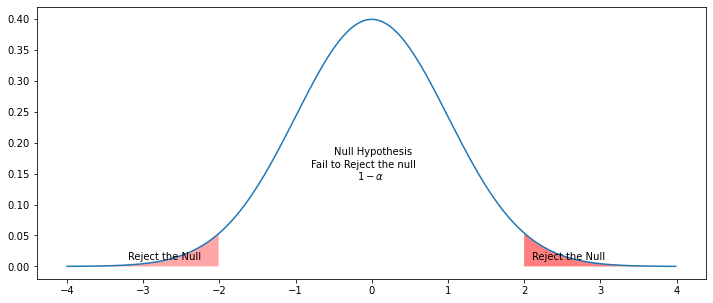

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

plt.figure(figsize=(12,5))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.text(x=-0.5, y=0.18, s= "Null Hypothesis")
plt.text(x=-0.8, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=-0.2, y=0.14, s=r'$1- \alpha$')
plt.text(x=2.1, y=0.01, s= "Reject the Null")
plt.text(x=-3.2, y=0.01, s= "Reject the Null")

If our hypotheses were

$H_0$: $\mu \leq 50$

$H_a$: $\mu > 50$

or 

$H_0$: $\mu \geq 50$

$H_a$: $\mu < 50$

we would be rejecting only values that were too big or too small, respectively. In these cases, the tests are **one-tailed**. The first case is referred to as a **right-tailed** hypothesis test and the second one is a **left-tailed** test.

Let's plot the right-tailed test only.

Text(2.1, 0.01, 'Reject the Null')

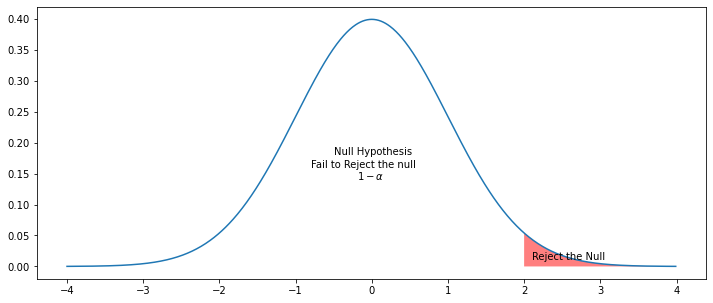

In [2]:
plt.figure(figsize=(12,5))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.text(x=-0.5, y=0.18, s= "Null Hypothesis")
plt.text(x=-0.8, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=-0.2, y=0.14, s=r'$1- \alpha$')
plt.text(x=2.1, y=0.01, s= "Reject the Null")


Next, let's plot the left-tailed test.

Text(-3.2, 0.05, 'Reject the Null')

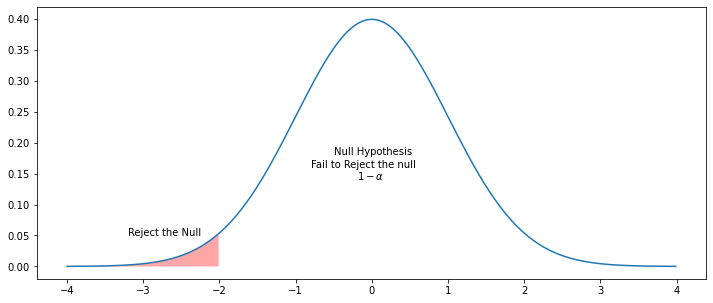

In [3]:
plt.figure(figsize=(12,5))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.text(x=-0.5, y=0.18, s= "Null Hypothesis")
plt.text(x=-0.8, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=-0.2, y=0.14, s=r'$1- \alpha$')
plt.text(x=-3.2, y=0.05, s= "Reject the Null")

### One or two-tailed test

We choose a two-tailed test when we are interested in change and have to consider change in both directions &mdash; positive and negative. For cases where the direction of change is known, we may use a one-tailed test.

The choice of test is often dictated by the business question. If a company invested in an advertising campaign and they wanted to know if the advertising changed the sales volume, they would collect samples from points of sale and choose a two-tailed test to prove or disprove that the sales volume changed. On the other hand, if the company is only interested in whether a sales *increase* occurred, a one-tailed test can be used.

Another example is a measure of group performance. Again, if we are interested in whether a certain group performs similarly to the entire company, a two-tailed test would be appropriate.

## Decision errors

Decisions are made based on samples that are subject to sampling error. Thus, the practitioner can make a mistake. In non-statistical hypothesis tests, we cannot calculate the probability of how often we are going to make a mistake. However, in a statistical hypothesis test, we can, based on the properties of the probability distribution that is applied.

The are two possible types of errors. In the court example, the jury could acquit a guilty defendant or convict an innocent defendant. Similarly, the practitioner could reject a null hypothesis when the null hypothesis is true or fail to reject the null when the alternative hypothesis is true. These are called **Type 1** and **Type 2** errors, respectively.

Decision errors can be represented by a **confusion matrix**.

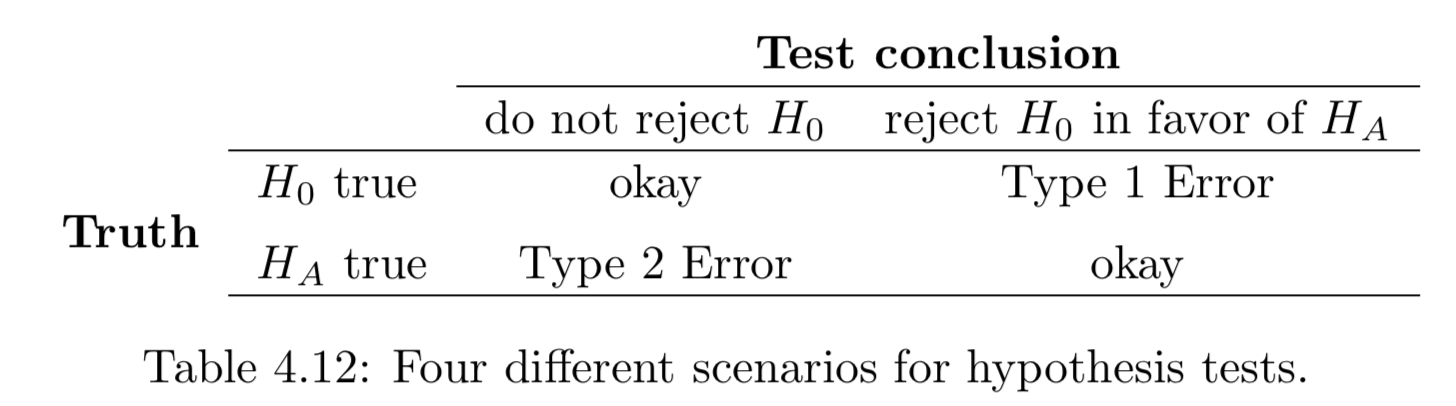

**Image**: *Visual aid summarizing Type 1 and Type 2 errors, as defined above.* **Source**: Dietz et al, (2017).

The probability of making a Type 1 error &mdash; the probability of rejecting the null when it is true &mdash; is called the **$\alpha$** error.  The probability of making a Type 2 error &mdash; the probability of failing to reject the null when the alternative hypothesis is true &mdash; is called the **$\beta$** error.


$$P(Type\  1\  error)=\alpha$$


$$P(Type\  2\  error)=\beta$$


In the same way that the $\alpha$ error is calculated by assuming $H_0$ to be true, the $\beta$ error is calculated by assuming $H_a$ to be true.  

There is a trade-off between the $\alpha$ and $\beta$ errors. For example, if we want to be very certain of not making a Type 1 error, the probability of a Type 2 error increases, and vice versa. The errors will depend on the sample size and how far apart $H_0$ and $H_a$ are.

The illustration below shows how $\alpha$ and $\beta$ are interrelated.

Text(0, 0.02, 'Type 2 Error')

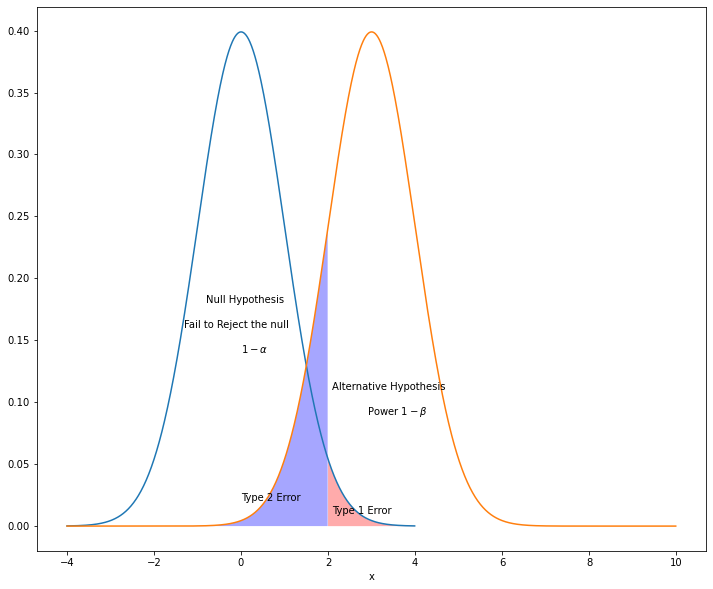

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(12,10))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

x2=np.arange(-4,10,0.01)
y2= stats.norm.pdf(np.arange(-4,10,0.01),loc = 3)
plt.plot(x2,y2)


plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-4,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,2,0.01),loc=3) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.xlabel("x")
plt.text(x=-0.8, y=0.18, s= "Null Hypothesis")
plt.text(x=-1.3, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=0.0, y=0.14, s=r'$1- \alpha$')
plt.text(x=2.1, y=0.11, s= "Alternative Hypothesis")
plt.text(x=2.9, y=0.09, s= 'Power ' r'$1-\beta$')
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
# plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

## Power of test

Hypothesis testing methods demonstrated so far are centred around the null hypothesis. This is because we are testing a certain claim we expect to be a fact and collect samples to test and confirm it. We do not know in advance what information a sample will bring us and usually the alternative is not known, while the null value is known.

However, often times in experiment planning we may know what effect we would like to see that is outside what we normally consider to be true. The "normal" value is taken as the null hypothesis and the unusual effect is taken as an alternative value.

It may be helpful to plan the experiment such that we will not miss important but unusual effects. In particular, we may determine an appropriate sample size where we can be 90 or 95% confident that we would detect any occurrences of important effects.

**Example**

Suppose a hospital reorganized their ER unit and expects the mean waiting time to be reduced by 20 min. It is known that the average waiting time before was 3 hours and the standard deviation is about $\sigma = 60$ min.

To determine if the new system helps to reduce waiting times, we will obtain a sample by collecting data about waiting times in the ER, and we would like to know what sample size we need to be 90% sure that the waiting time has been reduced by 20 min.

Before that, let's conduct hypothesis testing. Let's say we collected data about waiting times for 50 ER patients and the sample average is 2.5 hours. Can we confirm with 90% confidence that the new system is effective?

For a sample size of $N_s=50$ the degrees of freedom df $= 50 - 1 = 49$ are larger than 30, the distribution of the mean number of waiting hours is approximately normal, and the standard deviation is $SE=\frac{\sigma}{\sqrt{N_s}}$.

Text(0.5, 1.0, 'Null hypothesis')

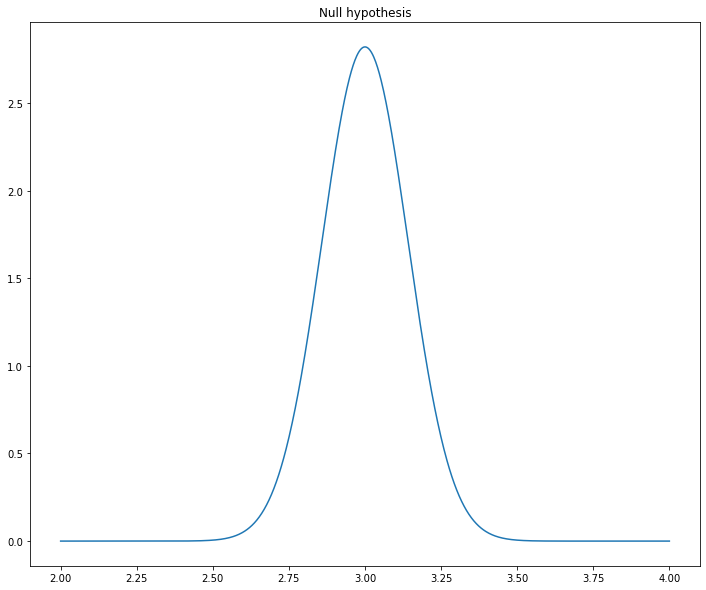

In [5]:
import scipy.stats as st
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

n_samples = 50
sigma = 1

se = sigma/sqrt(n_samples)

plt.figure(figsize=(12,10))

x = np.linspace(2, 4, 1000)
plt.plot(x, st.norm.pdf(x, loc=3, scale=se))

plt.title("Null hypothesis")

Here, the null hypothesis is that the number of hours did not change. The alternative hypothesis is that the number of hours has been reduced. Thus, this is a one-tailed test, and for $\alpha=0.10$ the null hypothesis $H_0$ is rejected if the sample mean hours are in the lower 10% tail.

Following the standard protocol, we shall calculate the p-value for the observed sample mean. This p-value or probability to observe the given mean value or less can be found using the cumulative distribution function.

In [6]:
p_value= st.norm.cdf(2+1/2, loc=3.00, scale=se)
print('P-value for given sample is ', p_value)

P-value for given sample is  0.0002034760087224789


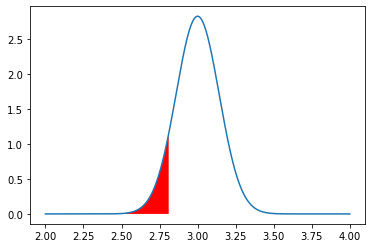

In [7]:
x_cr = st.norm.ppf(0.10, loc=3.00, scale=se)

plt.plot(x, st.norm.pdf(x, loc=3, scale=se))

plt.fill_between(x=np.arange(2, 2.82, 0.01), y1=st.norm.pdf(np.arange(2, 2.82, 0.01), loc=3, scale=se),
                 facecolor='red')


For this sample, we find a p-value = 0.0002035 much smaller than the significance level $\alpha=0.1$. We may reject the null hypothesis and our conclusion is that the collected sample confirms the reduction of waiting times in the ER unit. The null hypothesis is rejected when our sample mean falls in the red area. This red area marks the chosen significance level $\alpha=0.1$. Using the `ppf()` method we can find the $x$ value which marks the beginning of that 0.1 area.

In [8]:
x_cr = st.norm.ppf(0.10, loc=3.00, scale=se)
print(x_cr)

2.8187612395126354


Quite often in studies, we want to know how likely it is to detect an effect of interest. In our example we would like to know the probability of detecting the reduction of waiting times, which is the effect of interest in this case. This probability is called the __power of test__. If the hospital is interested in a reduction of waiting times by 20 minutes, the sample size is 50 and we want to know how likely we are to detect this effect in the study. 

To calculate the probability that we can reject the null hypothesis $H_0$ we will need to add another sampling distribution, but this time around $3 - \frac{1}{3} = 2\frac{2}{3}$ hours.

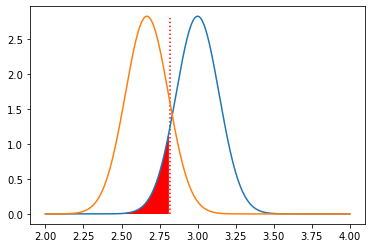

In [9]:
plt.plot(x, st.norm.pdf(x, loc=3, scale=se))

plt.fill_between(x=np.arange(2, 2.82, 0.01), y1=st.norm.pdf(np.arange(2, 2.82, 0.01), loc=3, scale=se), facecolor='red')

plt.plot(x, st.norm.pdf(x, loc=3 - 1/3, scale=se))

plt.fill_between(x=np.arange(2, 2.82, 0.01), y1=st.norm.pdf(np.arange(2, 2.82, 0.01), loc=3, scale=se), facecolor='red')

plt.vlines(2.8187612395126354, 0, 2.8, colors='r', linestyles='dotted')


Please note, that the new sampling distribution has the same standard error since we based our conclusions on the same sample of size of $n=50$. The null will be rejected when our sample mean is to the left of the dotted line. On the "null" curve this dotted line marks the rejection region which corresponds to the defined significance level $\alpha = 0.1$ (area in red).

The area under the orange curve to the left of the dotted line defines the probability to detect a sample with a mean of 2.818 or less, which means the probability to detect an effect we are looking for.

In [10]:
power_of_test = st.norm.cdf(2.81876, loc=3-1/3, scale=se)
print('The power of test when the reduction is 20 min and sample size is 50: ', power_of_test)

The power of test when the reduction is 20 min and sample size is 50:  0.858916093001692


A reduction of 20 min. is the minimum reduction we can detect with a probability of ~86%.

Most commonly we are looking for a power of test of 80% and sometimes 90%. These values are most commonly targeted, but in some cases we may be asked for 95% or even higher.

Let's find what sample size is required to get a power of test of 90% and a significance level of 1%. Here, we need to find the standard error such that the critical value would cut 1% to the left under the null curve and 10% to the right under the alternative curve.

In [11]:
# Find Z-score for 1% significance level:
Z_a = st.norm.ppf(0.01)

# and Z-score for 90% power of test:
Z_b = st.norm.ppf(0.90)

print('The Z-score for 1% is', Z_a)
print('The Z-score for 90% is', Z_b)

The Z-score for 1% is -2.3263478740408408
The Z-score for 90% is 1.2815515655446004


To find the new sample size, we may express the distance between the centres of the null and alternative curves as the sum of $Z_{\beta} \cdot SE$ and $Z_{\alpha} \cdot SE$. The Z-score such that 90% of the distribution is below it is $Z_{\beta} = 1.28$. Note that the Z-score value of the significance level of 1% calculated above has a negative sign indicating that this is to the left of the null curve centre. We are interested in the distance calculation and for this we can use its absolute value: the cutoff for the rejection region is $Z_{\alpha} = 2.33$.

The difference in centres should be $(2.33 + 1.28) \cdot SE = 3.61 \cdot SE$. For the 20 min difference between the centres we get the standard error:


$$SE = \frac{Centre_{null} - Centre_{alternative}}{Z_{\alpha} + Z_{\beta}} = \frac{\frac{1}{3}}{2.33 + 1.28} = 0.09239$$


To achieve this standard error, we have to collect a sample of size $N_{samples} = (\frac{\sigma}{SE})^2 = 117$

With the new sample size and listed requirements (1% significance level) we can find a new "critical" value and the power of test.

In [12]:
se_new = sigma/sqrt(117)
x_crit_new = 3 + st.norm.ppf(0.01) * se_new

print('New critical value', x_crit_new)

power_of_test_new = st.norm.cdf(x_crit_new, loc=3-1/3, scale=se_new)

print('The power of test for new sample size and significance level 1% is', power_of_test_new)

New critical value 2.784929062963567
The power of test for new sample size and significance level 1% is 0.8995872808074643


This is an approximate solution as the sample size is an integer. This power of test value tells us that the probability to miss the reduction of waiting time by 20 min from the potential sample of 117 is 1 - 0.89959 = 0.100041.

Text(2.95, 0.1, 'Type 2 Error')

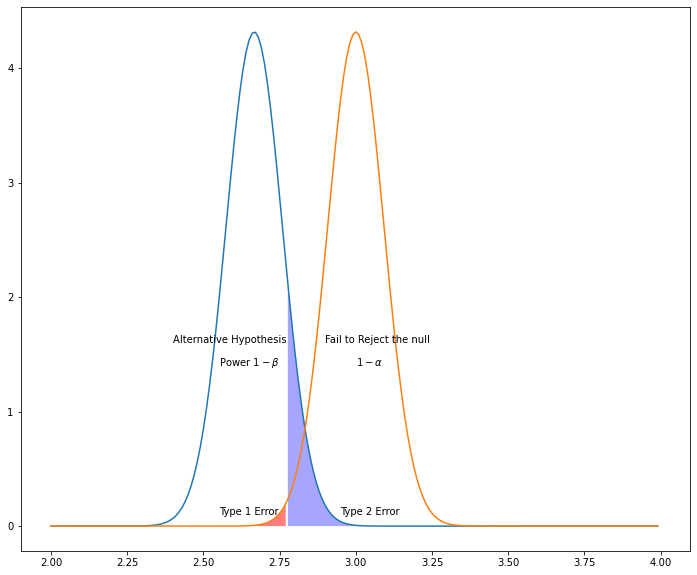

In [13]:
plt.figure(figsize=(12,10))

x1=np.arange(2,4,0.01)
y1= st.norm.pdf(np.arange(2,4,0.01), loc=3-1/3, scale = se_new )
plt.plot(x1,y1)

x2=np.arange(2,4,0.01)
y2= st.norm.pdf(np.arange(2,4,0.01),loc = 3, scale=se_new)
plt.plot(x2,y2)



plt.fill_between(x=np.arange(2,2.777,0.01), 
                 y1= st.norm.pdf(np.arange(2,2.777,0.01), loc=3, scale=se_new),
                 facecolor='red',alpha=0.5)


plt.fill_between(x=np.arange(2.777,4,0.01), 
                 y1= st.norm.pdf(np.arange(2.777,4,0.01), loc=3-1/3, scale=se_new) ,
                 facecolor='blue',
                 alpha=0.35)


plt.text(x=2.4, y=1.6, s= "Alternative Hypothesis")
plt.text(x=2.9, y=1.6, s= 'Fail to Reject the null ')
plt.text(x=3.0, y=1.4, s=r'$1- \alpha$')

plt.text(x=2.55, y=1.4, s= 'Power ' r'$1-\beta$')
plt.text(x=2.55, y=0.1, s= "Type 1 Error")
# plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=2.95, y=0.1, s= "Type 2 Error")

## Hypothesis Test Methodology

The objective of a statistical hypothesis test is to:

* Calculate a confidence interval assuming the null hypothesis is true


* Use the sample statistic to reject or fail to reject the null hypothesis

The null hypothesis is usually set as the common belief prior to the test, while the alternative hypothesis is what we want to prove by rejecting the null hypothesis. The practical reason for this approach is that it is a stronger result to reject the null than fail to reject it. Let's formalize these steps:

**The steps of any hypothesis test are:**

1. Formulate the null hypothesis and the alternative hypothesis.<br><br>

2. Specify the level of significance to be used.<br><br>

3. Select the test statistic.<br><br>

4. Establish the critical value or values of the test statistic.<br><br>

5. Determine the actual value of the test statistic.<br><br>

6. Make a decision.

**There are three equivalent approaches to hypothesis testing:**

1. **Critical value**: The sample statistic is more extreme than the critical value calculated from the significance level $\alpha$<br><br>

2. **Critical $Z_c$ value**: The $Z_{sample}$ value is more extreme than the critical value $Z_c$<br><br>

3. **p-value**: The probability $p$ of the sample statistic is less than the significance level $\alpha$

These three approaches are equivalent and will yield the same result. We can see this mathematically below:

Once the practitioner sets the $\alpha$ value, according to the following relation:

$$
P(-Z_\frac{\alpha}{2}, \frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}} ,+Z_\frac{\alpha}{2})=1-\alpha
$$

$-Z_\frac{\alpha}{2}$ and $+Z_\frac{\alpha}{2}$ are the critical values $Z_c$ and are calculated using the properties of the normal distribution.  Using the definition of $Z$, if we know $Z_c$ we can calculate the $X_c$.

$$
Z_c=\frac{x_c-\mu}{\sigma}
$$

Finally, the confidence interval defined by the critical values $X_c$ is the last criterion for rejection.

**Example**

Let's simulate normal data with a mean of 50 and a standard deviation of 10 and suppose that this is a sample from a larger population. Let's perform some tests on this data.

In [14]:
normal_sample = stats.norm.rvs(loc=50, scale=10, size=(50,1))
print("The sample average is",str(round(normal_sample.mean(),2)))

The sample average is 49.44


Let's hypothesize that it comes from a population with an of average of 50.0.

In [15]:
h_0=50.0
ttest=stats.ttest_1samp(normal_sample,h_0)
ttest

Ttest_1sampResult(statistic=array([-0.42710049]), pvalue=array([0.67117707]))

In [16]:
print("The t test statistic is",round(float(ttest.statistic),4)
    ,"and the p-value is",round(float(ttest.pvalue),4)
    ,"which means that the probability of obtaining a value of"
    ,str(round(normal_sample.mean(),1)),"just by chance (or randomly) is"
    ,str(round(float(ttest.pvalue)*100,2))
    ,"% assuming that the null hypothesis (the average is"
     ,h_0,") is true.")

The t test statistic is -0.4271 and the p-value is 0.6712 which means that the probability of obtaining a value of 49.4 just by chance (or randomly) is 67.12 % assuming that the null hypothesis (the average is 50.0 ) is true.


We fail to reject the null hypothesis that the population mean is 50.0.

Let's hypothesize that it comes from a population with an average of 43.0.

In [17]:
h_0=43.0
ttest=stats.ttest_1samp(normal_sample,h_0)

In [18]:
print("The t test statistic is",round(float(ttest.statistic),4)
    ,"and the p-value is",round(float(ttest.pvalue),4)
    ,"which means that the probability of obtaining a value of"
    ,str(round(normal_sample.mean(),1)),"just by chance (or randomly) is"
    ,str(round(float(ttest.pvalue)*100,2))
    ,"%")

The t test statistic is 4.8959 and the p-value is 0.0 which means that the probability of obtaining a value of 49.4 just by chance (or randomly) is 0.0 %


The probability assuming that $H_0$ is true is less than 5%. This is below our risk appetite, so we reject the null hypothesis in favour of the alternative that the average is different than 43.0.

## Types of hypothesis tests

So far, all concepts have been illustrated with the simplest scenario, which is when we want to know if the average of a population equals a specific value. This is a **one-sample hypothesis test** as we are with working with a sample of only one population.

In other circumstances, we may want to determine if two populations have the same average. In this case, we are comparing two populations and the test is called a **two-sample hypothesis test**.

However, there is a caveat in the case of two-sample hypothesis tests. Let's look at an example to explain.

Imagine that the manufacturer of a gas additive claims that their product can reduce gas consumption by 10%. We design an experiment where different makes and models are run with and without this additive. Then, we take the gas consumption average across cars with and without the additive and perform a hypothesis test under the null hypothesis that the additive has no effect on gas consumption.

Our experiment will lack sensitivity, because not only will gas consumption depend on the presence or absence of the additive, it will also depend on the intrinsic variability between makes and models.

To address this issue, we can conduct a **paired test**, where the same car's gas consumption is measured with and without the additive. We can calculate the consumption difference for each car and compare them by subtracting the two and checking if they equal zero. In this way, we account for the variability among makes and models by comparing each one against itself.

We will illustrate this through an exercise using data from the OpenIntro textbook.

**Exercise 1: Perform a hypothesis test in Python**

We will use the dataset provided in the `brain_size.csv` file (Dietz et al, 2017) along with the following `scipy.stats` functions.

* `ttest_1samp`


* `vttest_ind`


* `ttest_rel`

Perform the following hypothesis tests:

1. VIQ = 0 (one-sample t-test)<br><br>

2. female_viq = male_viq (two-sample t-test)<br><br>

3. FSIQ = PIQ (paired t-test)

In [19]:
# Your work here

In [20]:
import pandas as pd
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
data = data.drop("Unnamed: 0", axis=1)
data.head(10)

Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female   133  132  124   118.0    64.5     816932
1    Male   140  150  124     NaN    72.5    1001121
2    Male   139  123  150   143.0    73.3    1038437
3    Male   133  129  128   172.0    68.8     965353
4  Female   137  132  134   147.0    65.0     951545
5  Female    99   90  110   146.0    69.0     928799
6  Female   138  136  131   138.0    64.5     991305
7  Female    92   90   98   175.0    66.0     854258
8    Male    89   93   84   134.0    66.3     904858
9    Male   133  114  147   172.0    68.8     955466

In [21]:
data.describe()

FSIQ         VIQ        PIQ      Weight     Height     MRI_Count
count   40.000000   40.000000   40.00000   38.000000  39.000000  4.000000e+01
mean   113.450000  112.350000  111.02500  151.052632  68.525641  9.087550e+05
std     24.082071   23.616107   22.47105   23.478509   3.994649  7.228205e+04
min     77.000000   71.000000   72.00000  106.000000  62.000000  7.906190e+05
25%     89.750000   90.000000   88.25000  135.250000  66.000000  8.559185e+05
50%    116.500000  113.000000  115.00000  146.500000  68.000000  9.053990e+05
75%    135.500000  129.750000  128.00000  172.000000  70.500000  9.500780e+05
max    144.000000  150.000000  150.00000  192.000000  77.000000  1.079549e+06

In [22]:
# groupby: splitting a dataframe on values of categorical variables:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [23]:
# groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes:
groupby_gender.mean()

FSIQ     VIQ     PIQ      Weight     Height  MRI_Count
Gender                                                         
Female  111.9  109.45  110.45  137.200000  65.765000   862654.6
Male    115.0  115.25  111.60  166.444444  71.431579   954855.4

In [24]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [25]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [26]:
stats.ttest_rel(data['FSIQ'], data['PIQ']) 

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [27]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [28]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

**Solution**

In [29]:
import pandas as pd
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
data = data.drop("Unnamed: 0", axis=1)
data.head(10)

Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female   133  132  124   118.0    64.5     816932
1    Male   140  150  124     NaN    72.5    1001121
2    Male   139  123  150   143.0    73.3    1038437
3    Male   133  129  128   172.0    68.8     965353
4  Female   137  132  134   147.0    65.0     951545
5  Female    99   90  110   146.0    69.0     928799
6  Female   138  136  131   138.0    64.5     991305
7  Female    92   90   98   175.0    66.0     854258
8    Male    89   93   84   134.0    66.3     904858
9    Male   133  114  147   172.0    68.8     955466

In [30]:
data.describe()

FSIQ         VIQ        PIQ      Weight     Height     MRI_Count
count   40.000000   40.000000   40.00000   38.000000  39.000000  4.000000e+01
mean   113.450000  112.350000  111.02500  151.052632  68.525641  9.087550e+05
std     24.082071   23.616107   22.47105   23.478509   3.994649  7.228205e+04
min     77.000000   71.000000   72.00000  106.000000  62.000000  7.906190e+05
25%     89.750000   90.000000   88.25000  135.250000  66.000000  8.559185e+05
50%    116.500000  113.000000  115.00000  146.500000  68.000000  9.053990e+05
75%    135.500000  129.750000  128.00000  172.000000  70.500000  9.500780e+05
max    144.000000  150.000000  150.00000  192.000000  77.000000  1.079549e+06

From Dietz et al (2017):

- Full Scale Intelligence Quotient (FSIQ)


- Verbal Intelligence Quotient (VIQ)


- Performance Intelligence Quotient (PIQ)

In [31]:
# groupby: splitting a dataframe on values of categorical variables:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [32]:
# groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes:
groupby_gender.mean()

FSIQ     VIQ     PIQ      Weight     Height  MRI_Count
Gender                                                         
Female  111.9  109.45  110.45  137.200000  65.765000   862654.6
Male    115.0  115.25  111.60  166.444444  71.431579   954855.4

**One-sample t-test**: Testing the value of a population mean.

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distribution of a given population mean). It returns the t-statistic, and the p-value. The p-value measures the probability of getting a specific value assuming the null hypothesis is true just by random sampling variability.

This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the given population mean, $popmean$.

In the test below, the hypothesis is that the overall VIQ equals zero. From the table above, the overall VIQ average is 112.35. The t-test assuming a $H_0: \mu=0$ is 30.  The probability of obtaining this statistic or a mean of 112.35 when the actual population value is zero, $H_0$, just by random sampling variability, is very small: one in $10^{28}$.  The probability is very small, so we reject the null hypothesis, $H_0: \mu = 0$.

In [33]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

**2-sample t-test**: Testing for differences across populations.

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a two-sample t-test with `scipy.stats.ttest_ind()`. This is a two-sided test for the null hypothesis that two independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In this case, the probability of obtaining the measured difference between males and females is 44% just by sampling variability as per the p-value. This probability is very high, so we fail to reject the null hypothesis and we accept that male and females have the same VIQ.

In [34]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

**Paired test**: Repeated measurements on the same individuals.

PIQ, VIQ, and FSIQ give three measures of IQ. Let us test if FISQ and PIQ are significantly different. Can we just use a two-sample test?

The problem with this approach is that it does not account for links between observations &mdash; FSIQ and PIQ are measured on the same individuals. Thus, the variance due to inter-subject variability is confounded and can be removed using a "paired test" (also known as a "repeated measures test").

In [35]:
stats.ttest_rel(data['FSIQ'], data['PIQ']) 

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

This is equivalent to a one-sample test on the difference.

In [36]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

Let's compare this result against the two-sample t-test.

In [37]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

The p-value in the two-sample t-test approach is 64% while in the paired test it is 8%. By testing the paired differences between each individual in the population instead of the difference between the two populations, we removed the inter-subject variability.

Although the probability of the observed difference decreased from 64% to 8%, it is still above our risk appetite of 5% and we fail to reject the null hypothesis.

**End of Part 1**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

Diez, D., Çetinkaya-Rundel, M., & Barr, C.D. (2019). Chapter 7: Inference for numerical data. _OpenIntro Statistics_ (4th Ed.). https://www.openintro.org/stat/textbook.php?stat_book=os